# 3C 279 likelihood

In [1]:
%matplotlib inline
import corner, poisson
from importlib import reload
import main, light_curve
import warnings
warnings.filterwarnings('error')

### load all data

In [2]:
%%time 
self = main.Main('3C 279',  interval=1, mjd_range=None, 
                       weight_file='../data/3C279_weights.pkl')

Source 3C 279 at: (l,b)=(305.104,57.062); ROI radius=5
Loading data from 127 months 
	Selected 246775 photons within 5 deg of  (305.10,57.06)
	Dates: 2008-08-04 15:51 - 2018-08-01 19:25
	MJD  : 54682.7          - 58331.8         
Adding weights from file /nfs/farm/g/glast/u/burnett/analysis/lat_timing/data/3C279_weights.pkl
	2334 / 243421 photon pixels are outside weight region
	62381 weights set to NaN
CPU times: user 58.8 s, sys: 6.12 s, total: 1min 4s
Wall time: 1min 7s


#### Create a BinnedWeights object with all data, check it

In [3]:
bw=self.binned_weights()
#bw.test_plots();

Binning: 3649 intervals of 1 days from 54683.00 to 58332.00


#### Now pass that to the LightCurve class, which does fitting

In [17]:
reload(light_curve)
reload(poisson)
lc = light_curve.LightCurve(bw); 

Loaded 3548 / 3649 cells with exposure > 0.3 for light curve analysis


In [18]:
%time lc.poiss_fit()

Fit 3548 intervals: columns (t, exp, flux, errors, limit, ts, funct) in a DataFrame.
CPU times: user 24.5 s, sys: 84 ms, total: 24.6 s
Wall time: 24.7 s


In [19]:
lc.representation

'poiss'

In [20]:
df=lc.fit_df
df.head()

,t,flux,exp,errors,limit,ts,funct
0,54683.5,0.1549,0.843289,"[0.103, 0.147]",0.485,2.995,<class 'light_curve.PoissonRep'> flux: 0.155[1...
1,54684.5,0.2227,0.824270,"[0.141, 0.189]",0.628,3.235,<class 'light_curve.PoissonRep'> flux: 0.223[1...
2,54685.5,0.2163,0.833551,"[0.159, 0.204]",0.639,2.070,<class 'light_curve.PoissonRep'> flux: 0.216[1...
3,54686.5,0.4756,1.073581,"[0.159, 0.191]",0.847,16.576,<class 'light_curve.PoissonRep'> flux: 0.476[1...
4,54687.5,0.4191,0.987214,"[0.148, 0.182]",0.779,15.676,<class 'light_curve.PoissonRep'> flux: 0.419[1...


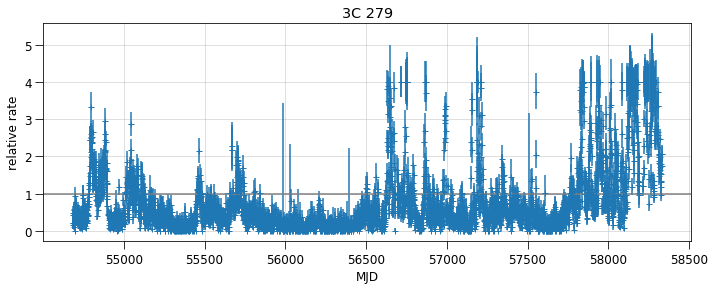

In [21]:
lc.flux_plot(title='3C 279');

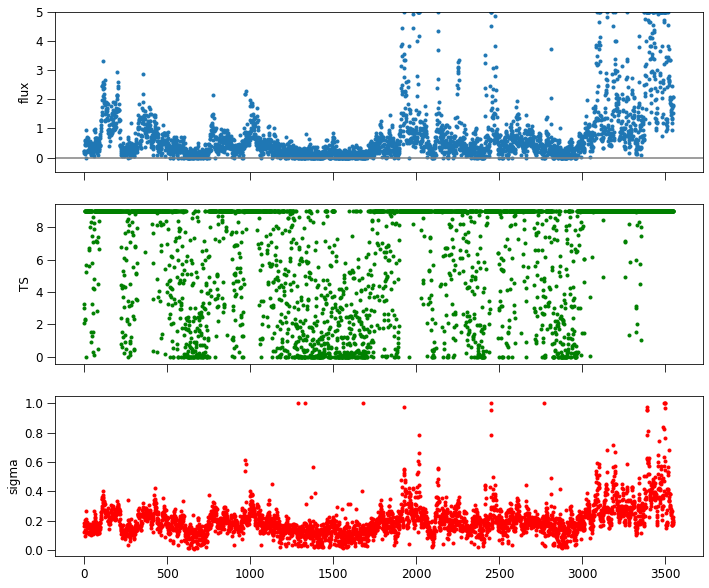

In [9]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(12,10), sharex=True)
ax1.plot(df.flux.values.clip(0,5), '.');
ax1.set(ylim=(-0.5,5), ylabel='flux')
ax1.axhline(0, color='grey');
ax2.plot(df.ts.values.clip(0,9),'.g');
ax2.set(ylabel='TS')
low=df.errors.apply(lambda x: (x[0]).values
ax3.plot(low.clip(-1,1), '.r'); ax3.set(ylabel='low');

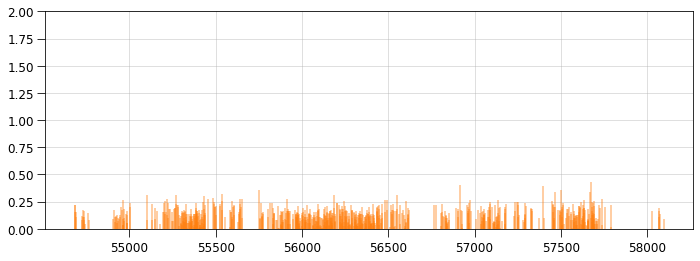

In [13]:
fig, ax = plt.subplots(figsize=(12,4))
df_lim =df.query('ts<4')
ax.errorbar(df_lim.t, y=df_lim.flux, yerr=df_lim.limit,  marker=None,color='C1', ls=' ', ms=3, uplims=True, alpha=0.5)
ax.set(yscale='linear', ylim=(0., 2)); ax.grid(alpha=0.5);

In [11]:
# fig=corner.corner(
#     df['   exp    alpha   beta sig_alpha sig_beta corr'.split()], bins=40,
#     range=[(0,2), (-1,2),(-1,1), (0,0.5),(0,0.5),(-0.6,-0.2) ],
#     hist_kwargs=dict(histtype='stepfilled',facecolor='lightblue', lw=2, edgecolor='blue'),
#     show_titles=True);
# fig.suptitle('3C 279 daily fits\n ', x=0.6, ha='left', fontsize=16);

KeyError: "['sig_alpha', 'beta', 'sig_beta', 'corr', 'alpha'] not in index"